# CHURN ANALYSIS OF A TELECOMS INDUSTRY

churn = the measure of how many customers stop using a product or service. Churn can be measured based on actual usage or failure to renew (when the product is sold using a description model). Often evaluated for a specific period of time, there can be monthly,quarterly or annual churn rate.

## Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("churn.txt")
df_1.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
# gives the number of columns present, identifies any missing data;'non-null', identifies the data type for each column, gives the shape of the dataset

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [4]:
# number of rows and columns
df_1.shape

(3333, 11)

In [5]:
#  checking for missing data (further exploration)
df_1.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

## Checking For Outliers

In [6]:
# statistical description of data
df_1.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


Several machine learning algorithms make the assumption that the data follow a normal (or Gaussian) distribution. This is easy to check with the skewness value, which explains the extent to which the data is normally distributed. Ideally, the skewness value should be between -1 and +1, and any major deviation from this range indicates the presence of extreme values.

In [7]:
print(df_1.skew())

Churn              2.018356
AccountWeeks       0.096606
ContractRenewal   -2.726332
DataPlan           0.999140
DataUsage          1.272057
CustServCalls      1.091359
DayMins           -0.029077
DayCalls          -0.111787
MonthlyCharge      0.594498
OverageFee        -0.023845
RoamMins          -0.245136
dtype: float64


conclusion: Churn, ContractRenewal, DataUsage, CustServCalls have been identified as the feastures with outliers.

## Visual observation of the outliers





                                                                       Columns with Outliers









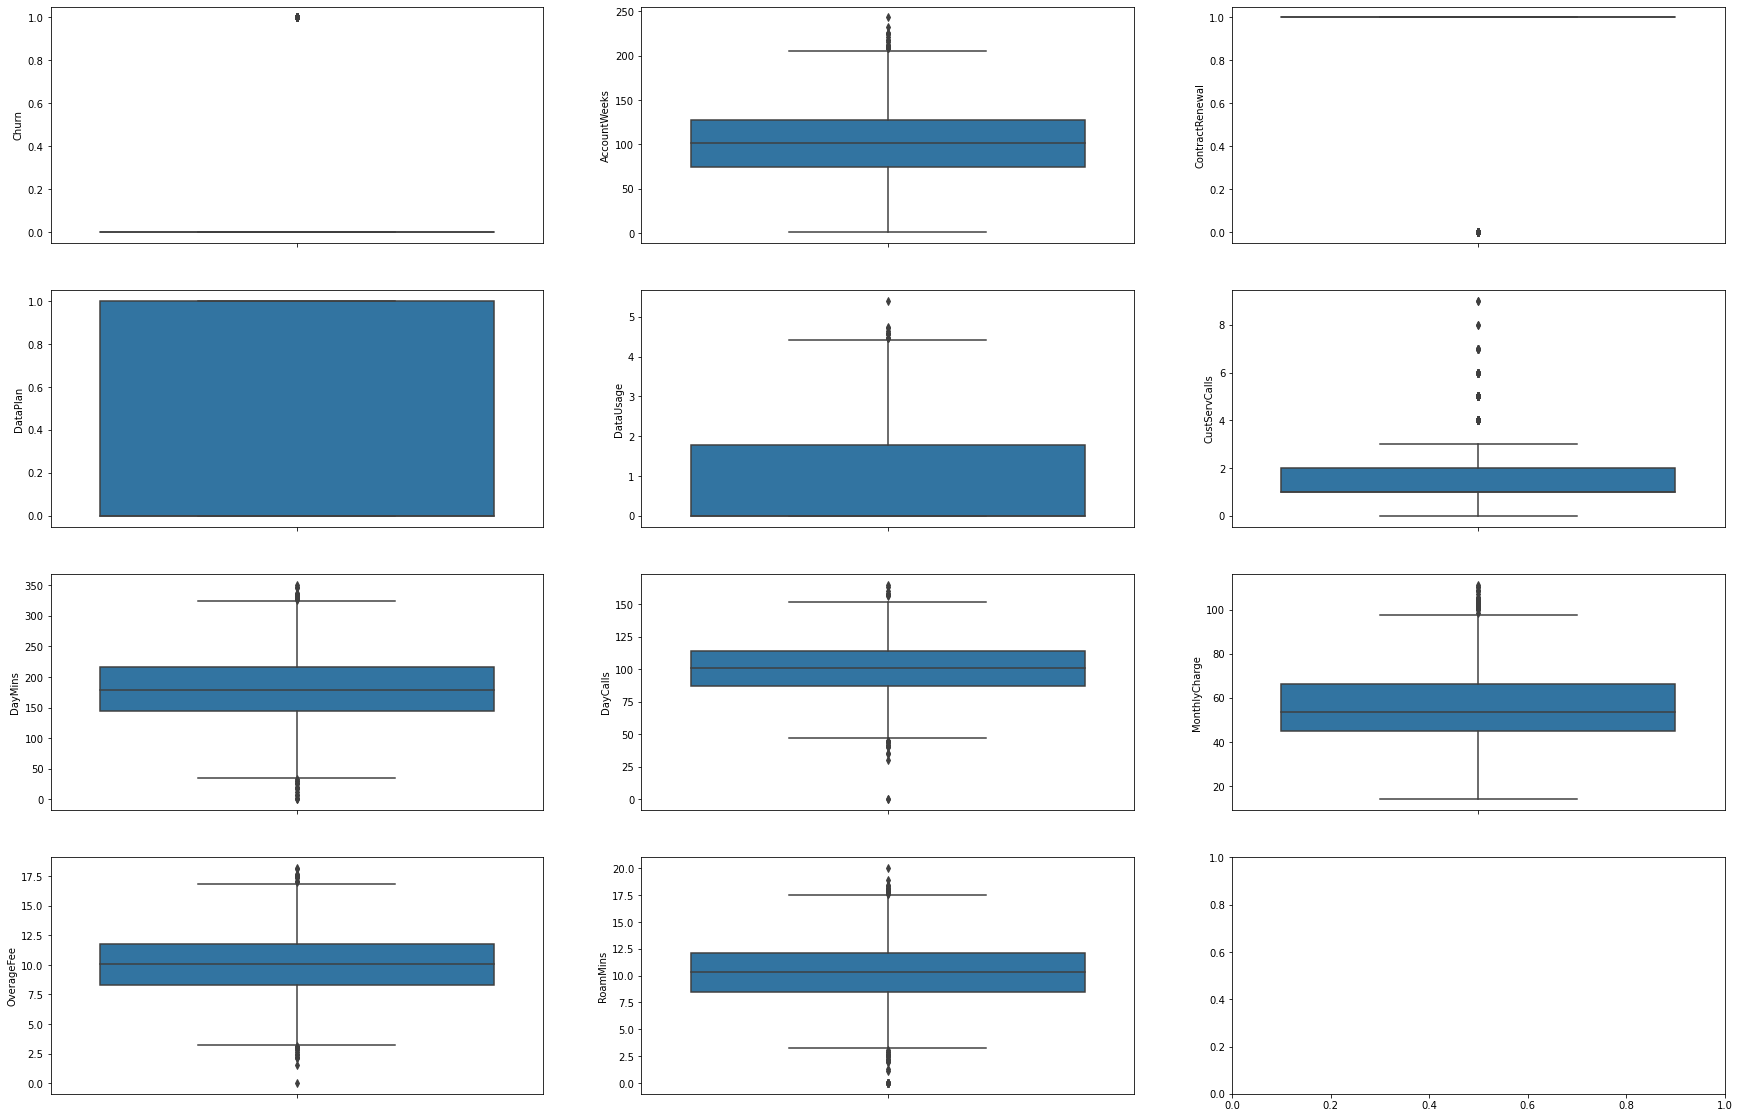

In [8]:
fig, axes = plt.subplots(4,3, figsize=(30, 20),squeeze=False)
axes = axes.flatten()
print('\n'*3)
print(' '*70, 'Columns with Outliers')
print('\n'*6)
for pl,col in enumerate(list(df_1.columns.values)):
    sns.boxplot(ax=axes[pl], data =df_1, y=col)
    

Based on the graphical analysis we can see that almost all columns contain outliers

## Dealing with outliers

My reason for dropping ContractRenewal is as follows; from the graph above '0' is represnted as an outlier, and there are customers who have only used the telecoms service while their subscription lasted and churned. Therefore, if '0' is removed the data for the customers who never renewed their contract but churned will be lost. Meaning a biased prediction model will be created.

Dropping the target attribute implies keeping the original content of the attribute. This will help in determining if the prediction model has done well, when a comparison is done between the outcomes of the prediction model and the target attributes. 

In [9]:
df_1_copy = df_1.copy()
df_1_copy.drop(['Churn', 'ContractRenewal'], axis= 1, inplace = True )
df_1_copy.columns

Index(['AccountWeeks', 'DataPlan', 'DataUsage', 'CustServCalls', 'DayMins',
       'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins'],
      dtype='object')

## ContractRenewal Evidence

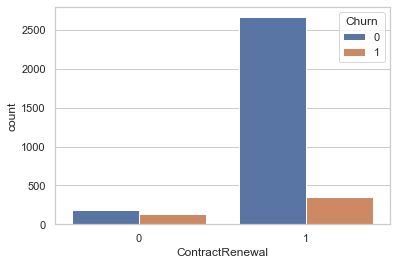

In [10]:
# correlation between Contract Renewal and Churn
# our focus is ' Chum =1' ; the brown plots

sns.set(style="whitegrid")
ax = sns.countplot(x="ContractRenewal", hue="Churn", data=df_1)
plt.rcParams['figure.figsize'] = 10, 5; 

<AxesSubplot:xlabel='ContractRenewal'>

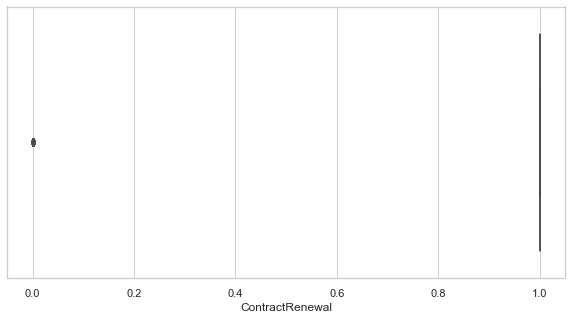

In [11]:
sns.boxplot(data=df_1,x=df_1['ContractRenewal'])

median & max = 1; outlier = 0

## Applying IOR Fomula to ContractRenewal

In [12]:
Q1=df_1['ContractRenewal'].quantile(0.25)
Q3=df_1['ContractRenewal'].quantile(0.75)
IQR=Q3-Q1
print('lower qunatile: ', Q1)
print('upper quantile: ', Q3)
print('IQR: ', IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

lower qunatile:  1.0
upper quantile:  1.0
IQR:  0.0
1.0 1.0


In [13]:
contract_renewal = df_1[(df_1['ContractRenewal'] <= Upper_Whisker) & ( df_1['ContractRenewal'] >= Lower_Whisker)]

<AxesSubplot:xlabel='ContractRenewal'>

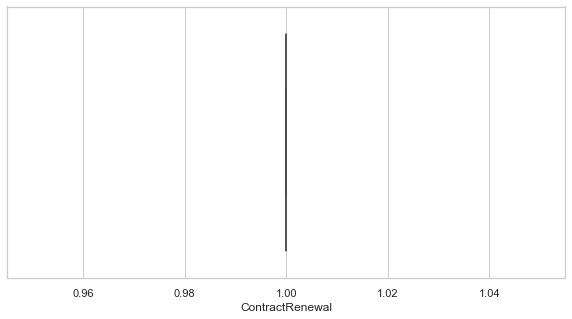

In [14]:
sns.boxplot(data=contract_renewal,x=contract_renewal['ContractRenewal'])

outlier '0' has been removed therefore, a part of the customer information has been lost. This justifies my explanation at the beginning of 'Dealing with Outliers'.

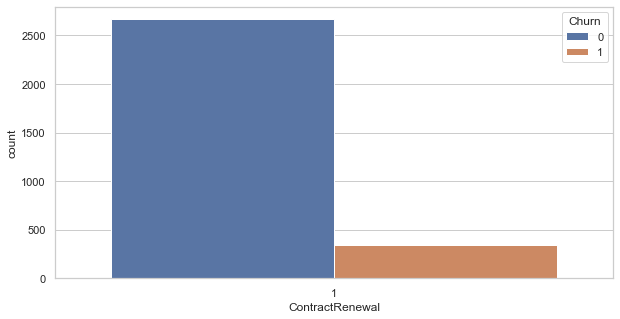

In [15]:
# correlation between Contract Renewal and Churn
# our focus is ' Chum =1' ; the brown plots

sns.set(style="whitegrid")
ax = sns.countplot(x="ContractRenewal", hue="Churn", data=contract_renewal)
plt.rcParams['figure.figsize'] = 10, 5; 

evidence 2 using a bar chat

## Applying the IOR Formula to the rest of the dataset

In [16]:
Q1=df_1_copy.quantile(0.25)
Q3=df_1_copy.quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

AccountWeeks      74.00
DataPlan           0.00
DataUsage          0.00
CustServCalls      1.00
DayMins          143.70
DayCalls          87.00
MonthlyCharge     45.00
OverageFee         8.33
RoamMins           8.50
Name: 0.25, dtype: float64
AccountWeeks     127.00
DataPlan           1.00
DataUsage          1.78
CustServCalls      2.00
DayMins          216.40
DayCalls         114.00
MonthlyCharge     66.20
OverageFee        11.77
RoamMins          12.10
Name: 0.75, dtype: float64
AccountWeeks     53.00
DataPlan          1.00
DataUsage         1.78
CustServCalls     1.00
DayMins          72.70
DayCalls         27.00
MonthlyCharge    21.20
OverageFee        3.44
RoamMins          3.60
dtype: float64
AccountWeeks     -5.50
DataPlan         -1.50
DataUsage        -2.67
CustServCalls    -0.50
DayMins          34.65
DayCalls         46.50
MonthlyCharge    13.20
OverageFee        3.17
RoamMins          3.10
dtype: float64 AccountWeeks     206.50
DataPlan           2.50
DataUsage          4.4

In [17]:
df_3 = df_1_copy[(df_1_copy <= Upper_Whisker) & ( df_1_copy >= Lower_Whisker)]

In [18]:
df_2 = pd.DataFrame(data= df_1, columns = ['ContractRenewal', 'Churn'])





                                                                       Columns with Outliers









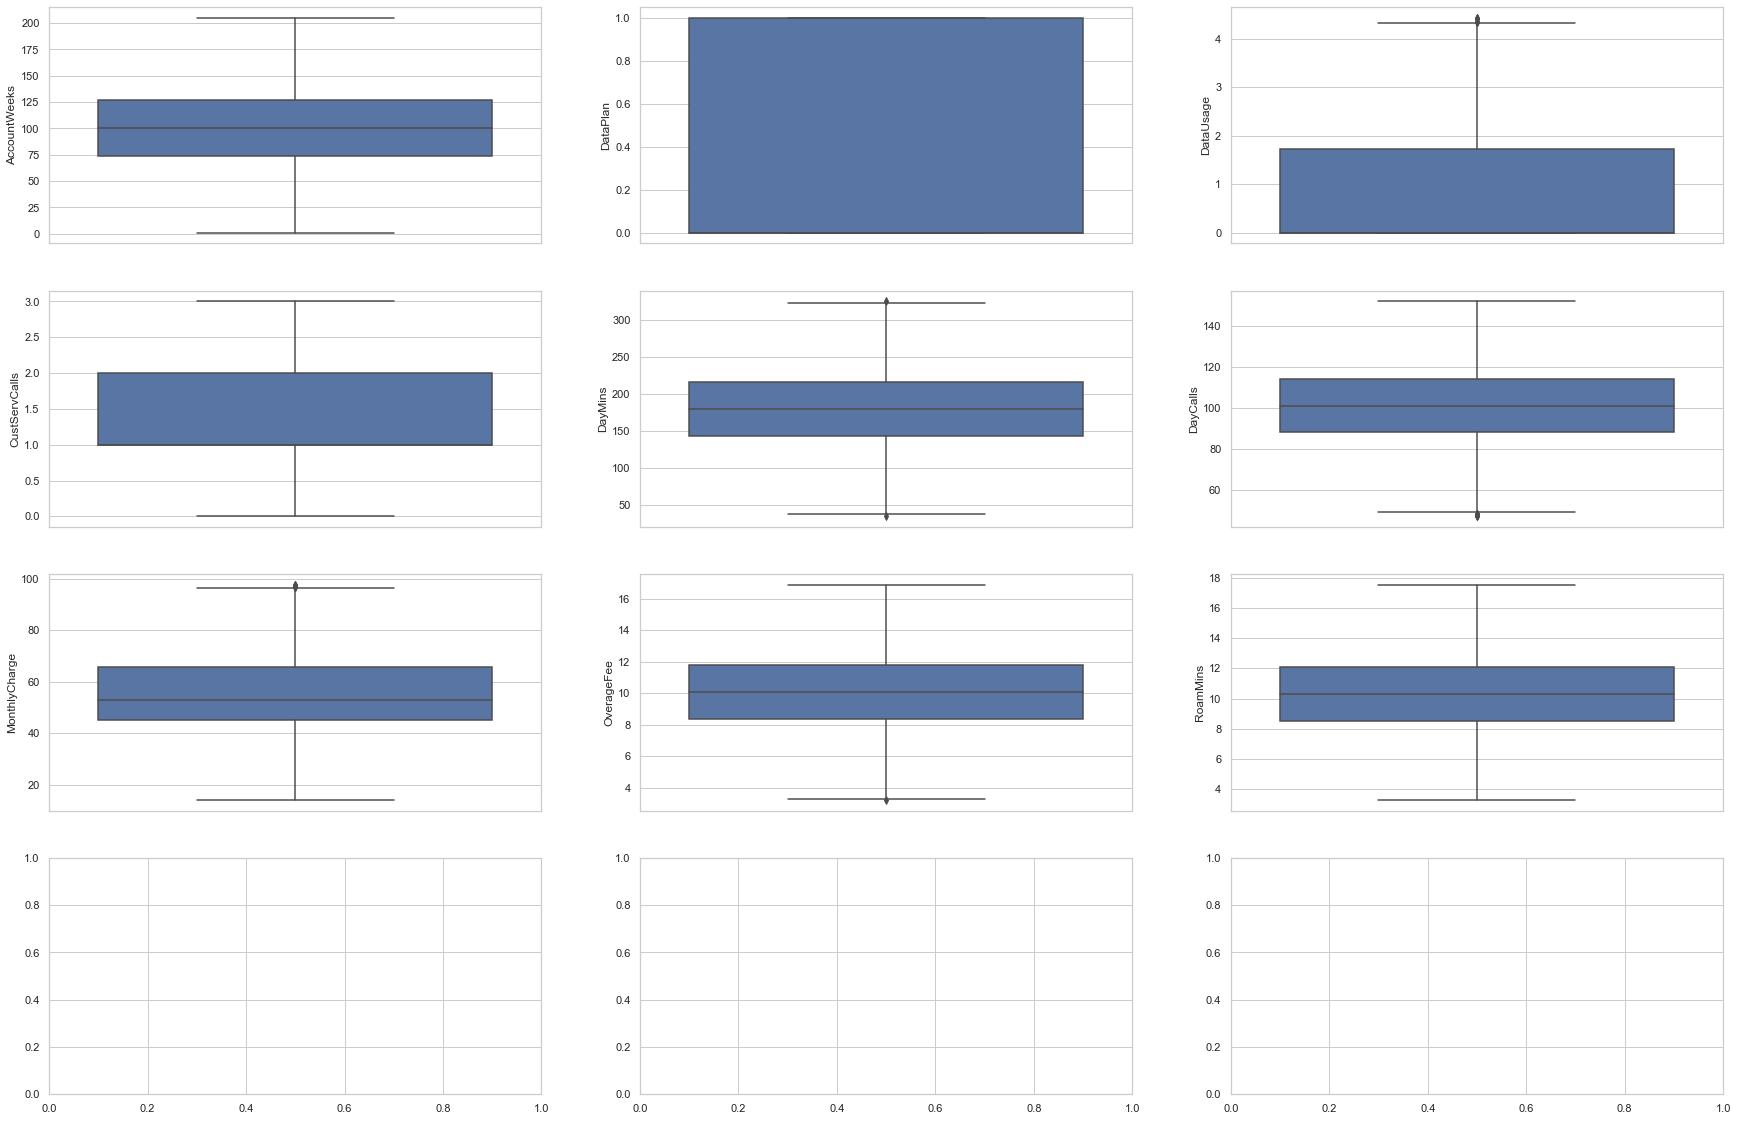

In [19]:

fig, axes = plt.subplots(4,3, figsize=(30, 20),squeeze=False)
axes = axes.flatten()
print('\n'*3)
print(' '*70, 'Columns with Outliers')
print('\n'*6)
for pl,col in enumerate(list(df_3.columns.values)):
    sns.boxplot(ax=axes[pl], data =df_3, y=col)

In [20]:
df_3.describe()

,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3315.000000,3333.000000,3322.000000,3066.000000,3308.000000,3310.000000,3299.000000,3309.000000,3287.000000
mean,100.430468,0.276628,0.803769,1.300065,179.946252,100.587613,55.816338,10.061272,10.293368
std,38.979656,0.447398,1.255351,0.972030,52.866353,19.417399,15.781626,2.460551,2.604587
min,1.000000,0.000000,0.000000,0.000000,35.100000,47.000000,14.000000,3.220000,3.300000
25%,74.000000,0.000000,0.000000,1.000000,144.000000,88.000000,45.000000,8.350000,8.500000
50%,100.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.000000,10.070000,10.300000
75%,127.000000,1.000000,1.730000,2.000000,216.200000,114.000000,65.750000,11.760000,12.100000
max,205.000000,1.000000,4.430000,3.000000,324.700000,152.000000,97.600000,16.860000,17.500000


## New dataset free from outliers

In [21]:
processed_data = pd.concat([df_3, df_2], axis= 1 )
processed_data

,AccountWeeks,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
0,128.0,1,2.70,1.0,265.1,110.0,89.0,9.87,10.0,1,0
1,107.0,1,3.70,1.0,161.6,123.0,82.0,9.78,13.7,1,0
2,137.0,0,0.00,0.0,243.4,114.0,52.0,6.06,12.2,1,0
3,84.0,0,0.00,2.0,299.4,71.0,57.0,NaN,6.6,0,0
4,75.0,0,0.00,3.0,166.7,113.0,41.0,7.42,10.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1,2.67,2.0,156.2,77.0,71.7,10.78,9.9,1,0
3329,68.0,0,0.34,3.0,231.1,57.0,56.4,7.67,9.6,1,0
3330,28.0,0,0.00,2.0,180.8,109.0,56.0,14.44,14.1,1,0
3331,184.0,0,0.00,2.0,213.8,105.0,50.0,7.98,5.0,0,0


In [22]:
print(processed_data.skew())

AccountWeeks       0.003259
DataPlan           0.999140
DataUsage          1.264256
CustServCalls      0.285895
DayMins           -0.001967
DayCalls          -0.017084
MonthlyCharge      0.486346
OverageFee         0.008104
RoamMins          -0.038146
ContractRenewal   -2.726332
Churn              2.018356
dtype: float64


## Data Visualization (Data Distribution Analysis)

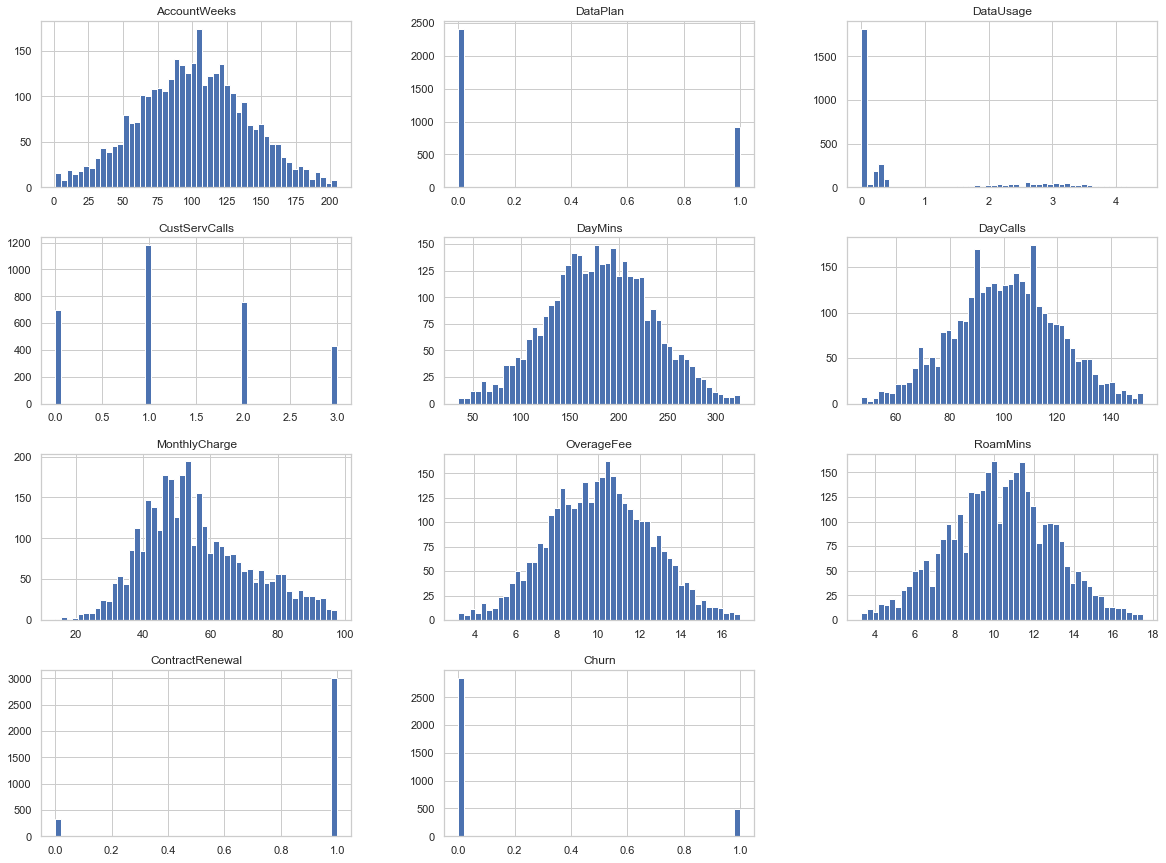

In [23]:
import matplotlib.pyplot as plt
processed_data.hist(bins = 50, figsize = (20,15))
plt.show()
%matplotlib inline

## Focusing on the columns with percuilar distribution (aside Churn column)

The perculiar dustributions are identified from the graph above.

In [24]:
unq_dist = processed_data[[('ContractRenewal'),('DataPlan'),('DataUsage'),('Churn')]]

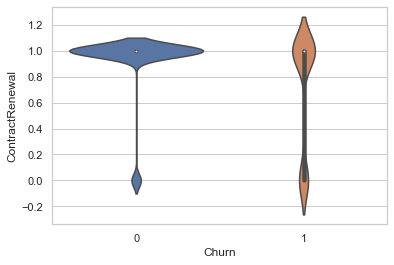

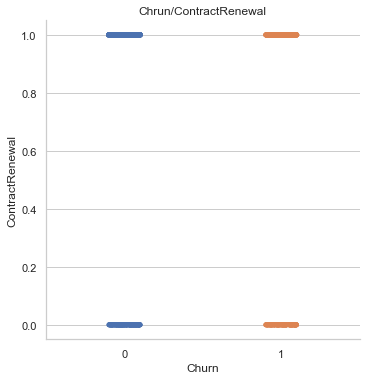

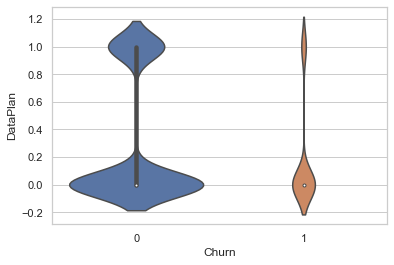

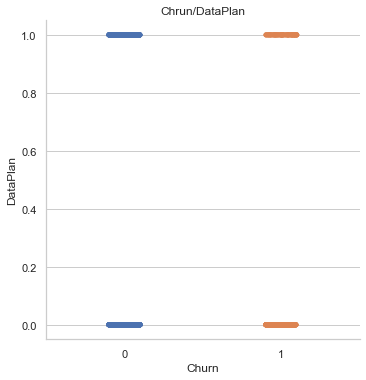

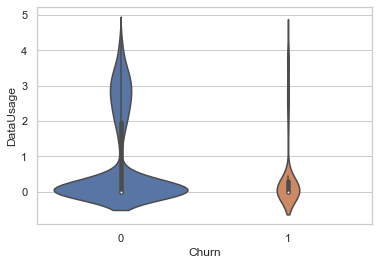

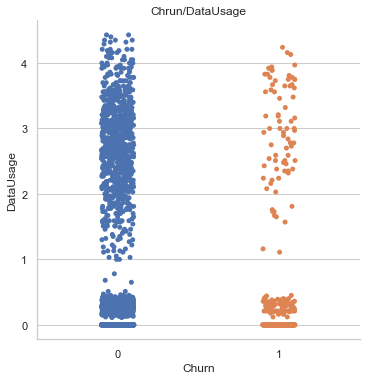

In [25]:
for col in (unq_dist.iloc[:,:-1].columns.values):
    sns.violinplot(y= col, x = 'Churn',data=unq_dist, scale='count')
    sns.catplot(y= col, data= unq_dist, x = 'Churn')
    plt.title(f'Chrun/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    
 

From my analysis these columns apart from 'Contract Renewal' Column aren't going to be helpful in predicting customers that churnned, so I drop them

## Dropping the 'DataPlan' and 'DataUsage' Columns

In [26]:
unq_dist.columns[1:3]

Index(['DataPlan', 'DataUsage'], dtype='object')

In [27]:
clean_data = processed_data.drop(unq_dist.columns[1:3], axis =1)

In [28]:
clean_data.head()

,AccountWeeks,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
0,128.0,1.0,265.1,110.0,89.0,9.87,10.0,1,0
1,107.0,1.0,161.6,123.0,82.0,9.78,13.7,1,0
2,137.0,0.0,243.4,114.0,52.0,6.06,12.2,1,0
3,84.0,2.0,299.4,71.0,57.0,NaN,6.6,0,0
4,75.0,3.0,166.7,113.0,41.0,7.42,10.1,0,0


## Correlation Analysis

In [29]:
corr_matrix = clean_data.corr()

In [30]:
# input features that correlate with Churn(1); our target value

corr_matrix["Churn"].sort_values(ascending=False)

Churn              1.000000
DayMins            0.188065
OverageFee         0.081772
MonthlyCharge      0.070658
RoamMins           0.057022
DayCalls           0.025247
AccountWeeks       0.011088
CustServCalls     -0.021795
ContractRenewal   -0.259852
Name: Churn, dtype: float64

<AxesSubplot:>

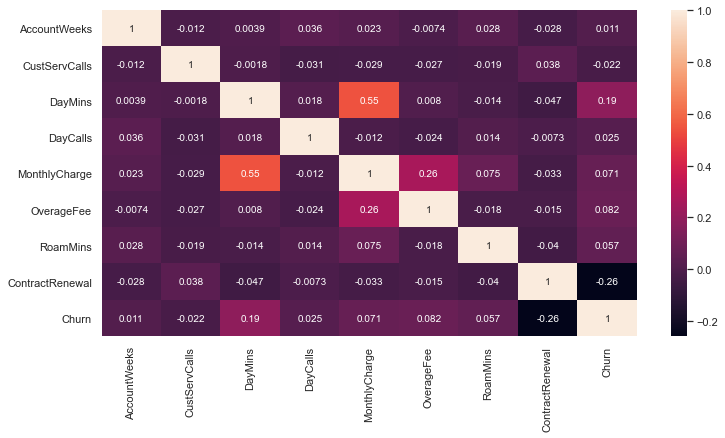

In [31]:
# visual representation of our correlation analysis using the heatmap

plt.figure(figsize=(12,6))
sns.heatmap(clean_data.corr(), annot= True)

## Data Visualization (2);  correlation analysis

With these visualizations, i can determine the columns that should be dropped.

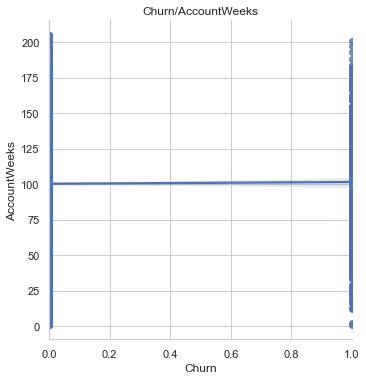

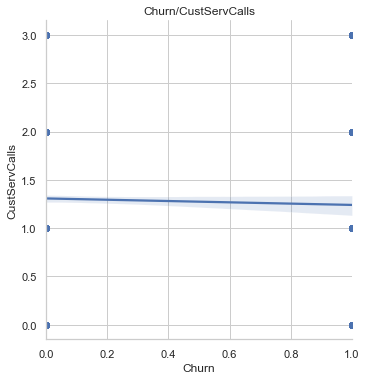

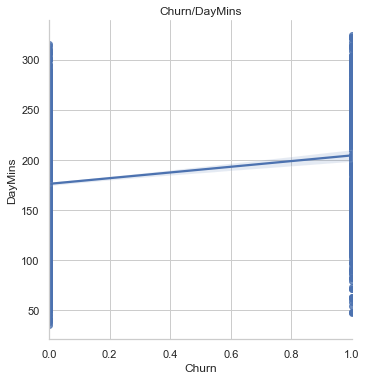

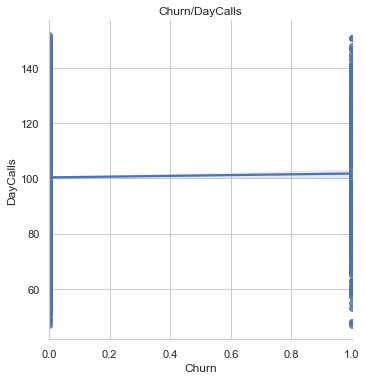

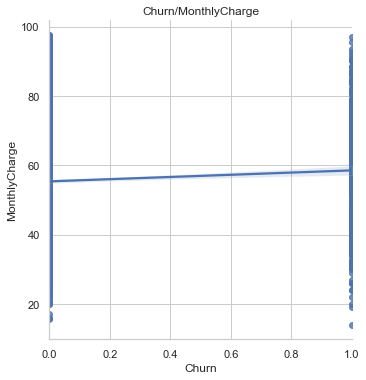

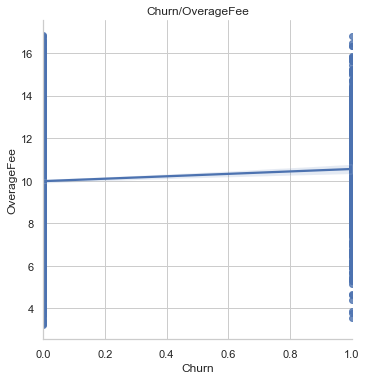

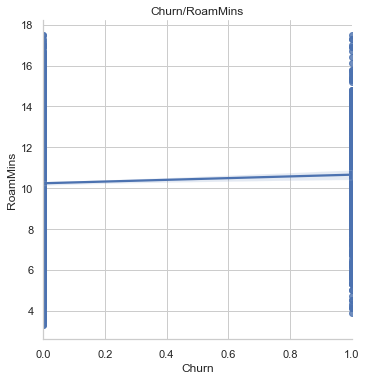

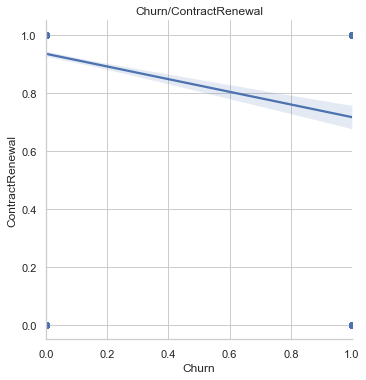

In [32]:
for col in (clean_data.iloc[:,:-1].columns.values):
    sns.lmplot(x='Churn',y=col,data=clean_data)
    plt.title(f'Churn/{col}');
    plt.ylabel(col);
    plt.show();
    plt.tight_layout();
    plt.close() 
    print('   ')

From the graph above, i will drop AccountWeeks and DayCalls because they have negligible to no correlation with Churn.

In [33]:
clean_data = clean_data.drop(['AccountWeeks', 'DayCalls'], axis=1)

In [34]:
clean_data.head()

,CustServCalls,DayMins,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
0,1.0,265.1,89.0,9.87,10.0,1,0
1,1.0,161.6,82.0,9.78,13.7,1,0
2,0.0,243.4,52.0,6.06,12.2,1,0
3,2.0,299.4,57.0,NaN,6.6,0,0
4,3.0,166.7,41.0,7.42,10.1,0,0


## Checking for Missing Columns

In [35]:
clean_data.isnull().sum()

CustServCalls      267
DayMins             25
MonthlyCharge       34
OverageFee          24
RoamMins            46
ContractRenewal      0
Churn                0
dtype: int64

There are columns with missing data

In [36]:
sample_incomplete_rows = clean_data[clean_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,CustServCalls,DayMins,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
3,2.0,299.4,57.0,NaN,6.6,0,0
6,3.0,218.2,87.3,NaN,7.5,1,0
8,1.0,184.5,63.9,NaN,8.7,1,0
10,NaN,129.1,44.9,11.43,12.7,1,1
14,NaN,120.7,47.0,15.36,13.1,1,0


## Dealing with missing columns

In [37]:
clean_data.describe()

,CustServCalls,DayMins,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
count,3066.000000,3308.000000,3299.000000,3309.000000,3287.000000,3333.000000,3333.000000
mean,1.300065,179.946252,55.816338,10.061272,10.293368,0.903090,0.144914
std,0.972030,52.866353,15.781626,2.460551,2.604587,0.295879,0.352067
min,0.000000,35.100000,14.000000,3.220000,3.300000,0.000000,0.000000
25%,1.000000,144.000000,45.000000,8.350000,8.500000,1.000000,0.000000
50%,1.000000,179.400000,53.000000,10.070000,10.300000,1.000000,0.000000
75%,2.000000,216.200000,65.750000,11.760000,12.100000,1.000000,0.000000
max,3.000000,324.700000,97.600000,16.860000,17.500000,1.000000,1.000000


In [38]:
# Imputation transformer for completing missing values.
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

In [39]:
imputer.fit(clean_data)

SimpleImputer()

In [40]:
imputer.statistics_

array([1.30006523e+00, 1.79946252e+02, 5.58163383e+01, 1.00612723e+01,
       1.02933678e+01, 9.03090309e-01, 1.44914491e-01])

In [41]:
# Check that (.statistics_) is the same as manually computing the mean of each attribute:
clean_data.mean().values

array([1.30006523e+00, 1.79946252e+02, 5.58163383e+01, 1.00612723e+01,
       1.02933678e+01, 9.03090309e-01, 1.44914491e-01])

In [42]:
# transform the training set by replacing missing values with the learned medians:
a = imputer.transform(clean_data)

In [43]:
final_data = pd.DataFrame(a, columns=clean_data.columns, index=clean_data.index)

In [44]:
final_data.loc[sample_incomplete_rows.index.values]

,CustServCalls,DayMins,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
3,2.000000,299.4,57.0,10.061272,6.6,0.0,0.0
6,3.000000,218.2,87.3,10.061272,7.5,1.0,0.0
8,1.000000,184.5,63.9,10.061272,8.7,1.0,0.0
10,1.300065,129.1,44.9,11.430000,12.7,1.0,1.0
14,1.300065,120.7,47.0,15.360000,13.1,1.0,0.0


In [45]:
final_data.isnull().sum()

CustServCalls      0
DayMins            0
MonthlyCharge      0
OverageFee         0
RoamMins           0
ContractRenewal    0
Churn              0
dtype: int64

no more missing values

In [46]:
print(final_data.skew())

CustServCalls      0.298072
DayMins           -0.001975
MonthlyCharge      0.488843
OverageFee         0.008133
RoamMins          -0.038412
ContractRenewal   -2.726332
Churn              2.018356
dtype: float64


checked for outliers, all the columns are ok except for which the explanations can be found in the outlier section of this notebook.

## Data Sampling

Knowing the count for our target data as shown below. (This shows that our dataset is underesampled. Since our target value is '1'; it means we're meant to develop a model that is good at predicting churn(1) and not vice versa.)

In [47]:
# 1 = Churn ; 0 = No Churn
final_data.Churn.value_counts()

0.0    2850
1.0     483
Name: Churn, dtype: int64

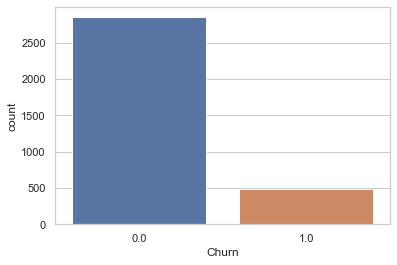

In [48]:
sns.countplot(x = 'Churn', data = final_data);

In [49]:
# sample split
from sklearn.model_selection import train_test_split

#x = final_data[['ContractRenewal', 'CustServCalls', 'DayMins', 'MonthlyCharge', 'OverageFee', 'RoamMins']]
x = final_data.iloc[:,:-1]    # Predictors
y = final_data.iloc[:, -1]    # Target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.01, random_state = 42)

In [50]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape)) 

print("Before OverSampling, counts of label '1' in y_train is : {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0' in y_train is : {} \n".format(sum(y_train == 0))) 


Before OverSampling, the shape of train_X: (3299, 6)
Before OverSampling, the shape of train_y: (3299,) 

Before OverSampling, counts of label '1' in y_train is : 480
Before OverSampling, counts of label '0' in y_train is : 2819 



In [51]:
import imblearn
from imblearn.over_sampling import ADASYN

sampler = ADASYN(random_state=42)
x_train_samp, y_train_samp = sampler.fit_sample(x_train, y_train.ravel()) # the new x and y but the sampled version

print('After OverSampling, the shape of train_X: {}'.format(x_train_samp.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_samp.shape)) 

print("After OverSampling, counts of label '1 in y_train is ': {}".format(sum(y_train_samp == 1))) 
print("After OverSampling, counts of label '0'in y_train is: {}".format(sum(y_train_samp == 0))) 

After OverSampling, the shape of train_X: (5691, 6)
After OverSampling, the shape of train_y: (5691,) 

After OverSampling, counts of label '1 in y_train is ': 2872
After OverSampling, counts of label '0'in y_train is: 2819


## Creating the Data PyCaret will use to evaluate models

In [52]:
x_train_samp.shape

(5691, 6)

In [53]:
y_train_samp.shape

(5691,)

In [54]:
pc_data = x_train_samp
pc_data['Churn'] = y_train_samp

In [55]:
pc_data.head()

,CustServCalls,DayMins,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
0,1.000000,197.000000,51.0,10.13,9.1,1.0,0.0
1,2.000000,227.400000,54.0,8.80,6.3,1.0,0.0
2,1.000000,179.946252,17.0,8.09,10.6,1.0,0.0
3,0.000000,116.900000,69.7,11.62,11.0,1.0,0.0
4,1.300065,103.500000,32.0,5.90,12.0,1.0,1.0


During the process of finding the mean of some missing values, some colums with originally integer datatypes were converted to float datatypes. The cell below helps to convert those affected columns back to integer values.

In [56]:
pc_data = pc_data.astype({"CustServCalls":'int', "Churn":'int', "ContractRenewal":'int'}) 

In [57]:
pc_data.head()

,CustServCalls,DayMins,MonthlyCharge,OverageFee,RoamMins,ContractRenewal,Churn
0,1,197.000000,51.0,10.13,9.1,1,0
1,2,227.400000,54.0,8.80,6.3,1,0
2,1,179.946252,17.0,8.09,10.6,1,0
3,0,116.900000,69.7,11.62,11.0,1,0
4,1,103.500000,32.0,5.90,12.0,1,1


In [58]:
pc_data.isnull().sum()

CustServCalls      0
DayMins            0
MonthlyCharge      0
OverageFee         0
RoamMins           0
ContractRenewal    0
Churn              0
dtype: int64

## Using PyCaret to see which models performed well

PyCaret's default metric is accuracy score.

In [59]:
#pip install pycaret --user

In [60]:
import pycaret
print('Pycaret: {}'.format(pycaret.__version__))

Pycaret: 2.2.0


In [61]:
pc_data.Churn.value_counts()

1    2872
0    2819
Name: Churn, dtype: int64

In [62]:
from pycaret.classification import *
models = setup(data = pc_data, target = 'Churn',normalize = True, normalize_method = 'zscore',transformation = True,
              verbose = False, html = True, train_size = 0.80,silent = True, session_id = 100, numeric_features = ['ContractRenewal', 'CustServCalls'])  

#numeric_features = categorical values


In [63]:
best3 = compare_models(n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8913,0.9548,0.9217,0.8718,0.8960,0.7823,0.7837,0.3230
xgboost,Extreme Gradient Boosting,0.8886,0.9541,0.9070,0.8787,0.8922,0.7771,0.7782,0.4310
rf,Random Forest Classifier,0.8858,0.9513,0.9122,0.8699,0.8904,0.7713,0.7725,0.4310
lightgbm,Light Gradient Boosting Machine,0.8754,0.9459,0.8962,0.8645,0.8798,0.7507,0.7517,0.1440
catboost,CatBoost Classifier,0.8733,0.9420,0.8979,0.8597,0.8782,0.7462,0.7474,3.6990
dt,Decision Tree Classifier,0.8449,0.8446,0.8620,0.8386,0.8498,0.6896,0.6906,0.0150
gbc,Gradient Boosting Classifier,0.8311,0.9087,0.8508,0.8234,0.8367,0.6619,0.6625,0.2100
knn,K Neighbors Classifier,0.8229,0.8973,0.8910,0.7887,0.8366,0.6450,0.6511,0.0860
ada,Ada Boost Classifier,0.7920,0.8654,0.7725,0.8112,0.7908,0.5841,0.5856,0.0930
qda,Quadratic Discriminant Analysis,0.7221,0.8237,0.5268,0.8776,0.6578,0.4476,0.4895,0.0190


Extra Trees Classifier model performed the best in all the metrics except for the precision score where the Naive Bayes model performed better.

In [64]:
for count,i in enumerate(best3): 
    print('\n','best3[{}] is: {}'.format(count,i), '\n'*3 )


 best3[0] is: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=100, verbose=0,
                     warm_start=False) 




 best3[1] is: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              obje

Now, i'll carry out blending on the top three techniques. Blending is an ensemble technique that uses predictions from multiple models to generate a final set of predictions using voting / majority consensus from all of the models passed in the estimator_list parameter. 

## Blending

In [65]:
# blend top3 models from compare_models
blend_top3 = blend_models(best3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8794,0.9562,0.9181,0.8554,0.8857,0.7584,0.7605
1,0.8553,0.9358,0.9095,0.8242,0.8648,0.7099,0.7139
2,0.8989,0.9641,0.9307,0.8776,0.9034,0.7976,0.7991
3,0.8989,0.9590,0.9177,0.8870,0.9021,0.7976,0.7981
4,0.8857,0.9522,0.9134,0.8683,0.8903,0.7712,0.7723
5,0.9143,0.9667,0.9307,0.9034,0.9168,0.8284,0.8288
6,0.8967,0.9658,0.9134,0.8866,0.8998,0.7933,0.7936
7,0.9209,0.9770,0.9307,0.9149,0.9227,0.8417,0.8418
8,0.8923,0.9562,0.9264,0.8699,0.8973,0.7843,0.7861
9,0.8967,0.9605,0.9134,0.8866,0.8998,0.7933,0.7936


From the blending result, the improvement is really negligible compared to the best performing model. The overall performance is still the same percentage(89%).

Now i'll be carrying out feature importance on the best performing model. Best performing model = Extra Trees Classifier

## Feature Importance

In [66]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8728,0.9470,0.9009,0.8566,0.8782,0.7453,0.7463
1,0.8640,0.9336,0.9095,0.8373,0.8719,0.7276,0.7304
2,0.8791,0.9592,0.9134,0.8577,0.8847,0.7579,0.7596
3,0.8923,0.9564,0.9177,0.8760,0.8964,0.7844,0.7853
4,0.8857,0.9474,0.9221,0.8623,0.8912,0.7711,0.7730
5,0.9033,0.9661,0.9264,0.8880,0.9068,0.8064,0.8072
6,0.8835,0.9582,0.9177,0.8618,0.8889,0.7667,0.7684
7,0.9319,0.9759,0.9524,0.9167,0.9342,0.8636,0.8643
8,0.9011,0.9491,0.9307,0.8811,0.9053,0.8020,0.8033
9,0.8989,0.9556,0.9264,0.8807,0.9030,0.7976,0.7987


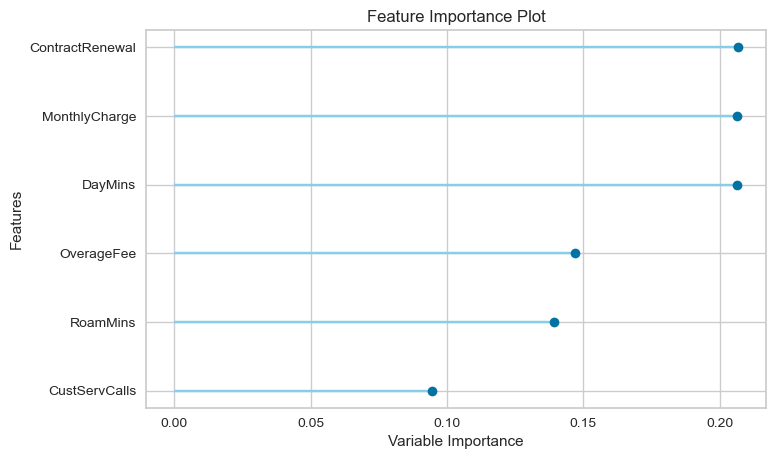

In [67]:
plot_model(et, plot='feature')

Feature Importance Plot: tells us the features to observe when determining the churn of any customer connected to this telecommunications company.

## Evaluation for the best performing model

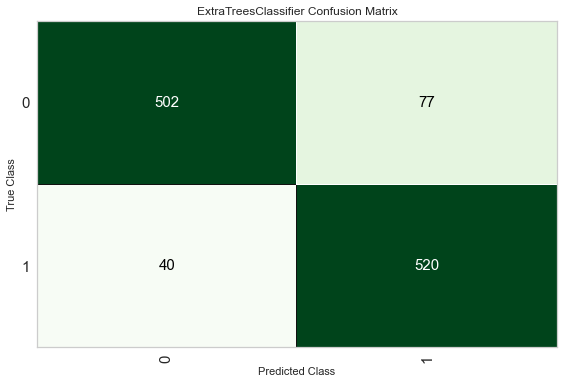

In [98]:
plot_model(et, plot = 'confusion_matrix')

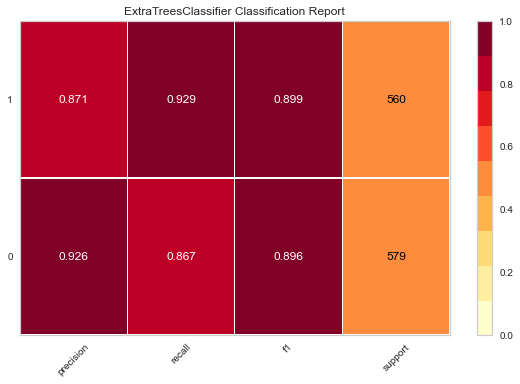

In [99]:
plot_model(et, plot = 'class_report')

## Prediction on test sample

All of the evaluation metrics we have seen above are cross validated results based on the training set (80%) only. Now, using our final trained model stored in the tuned_rf variable we will predict against the test sample and evaluate the metrics to see if they are different than the training results.

In [101]:
predict_model(et);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8973,0.9594,0.9286,0.8710,0.8989,0.7947,0.7964


The results show our model is doing well